# Foundations of AI/ML by IIIT-Hyderabad & Talent Sprint
# Lab04 Experiment 02 - Part 1

# Image Classification

In this experiment, we will learn to build a machine learning pipeline step by step. As mentioned
in the last lecture, a machine learning system consists of the following depending on whether the
system is in training or testing phase:

### **Training**:

- **Getting Data** - While solving real-world problems in the “wild”, data is seldom present in pretty formats like .csv. Parsing the data is an integral part of machine learning in which data science engineers spend majority of their time.

- **Feature Extraction** - This step involves cleaning the data, identifying the useful attributes/features for solving the problem, interpolating values of missing attributes and reducing the dimensionality of the data if required.

- Deciding on a learning algorithm and model hyperparameters.

- **Validation** - Validating the generated model on a validation set with a suitable evaluation metric.

The model and parameters which result in highest validation accuracy are used in the
testing phase.

### **Testing**:

- **Getting Data** - Getting data which is unseen by the model till now.

- **Feature Extraction** - This step is carried out in the same manner as during training phase. The same set of features and processing pipeline are used during training and testing.

- **Prediction** - Prediction using the model obtained in the training phase. No part of the model state (including the hyperparameters) can be tuned at this point

Let us go through these step-by-step.

In [ ]:
## !apt-get update
## !apt-get -y install python-opencv

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# GETTING THE DATA

The dataset that we shall be using is a subset of the [VGG-Face](http://www.robots.ox.ac.uk/~vgg/data/vgg_face/) dataset. It consists of 20 images each of 10 Indian celebrities. We have already pre-processed it and it is availabale in a directory called vgg_face_indian_dataset, inside the Datasets folder.

**DO NOT download anyfiles from the link above**

In [2]:
indians = ["A.R._Rahman", "Aamir_Khan", "Amitabh_Bachchan", "A_P_J_Abdul_Kalam", "Kamal_Hassan", "Madhuri_Dixit", "Mahendra_Singh_Dhoni", "Preity_Zinta", "Vidya_Balan", "Virat_Kohli"]

# 1. Understanding the dataset

Let us see a raw image in the dataset:

In [3]:
# Directory names
dataset_dir = '../Datasets/vgg_face_indian_dataset'
raw_images_dir = '../Datasets/vgg_face_indian_dataset/raw'
face_images_dir = '../Datasets/vgg_face_indian_dataset/faces'

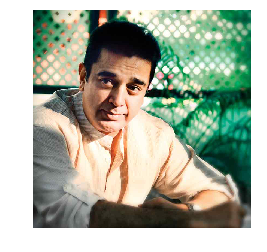

In [6]:
# Read an image in the "raw" directory
example_raw_image = cv2.imread(os.path.join(raw_images_dir, "A.R._Rahman_01.jpg"))
# Show it
plt.imshow(cv2.cvtColor(example_raw_image, cv2.COLOR_BGR2RGB)) # Ignore "cv2.COLOR_BGR2RGB"
plt.axis("off")
plt.show()

In the dataset, 20 images each of 10 celebrities.

The bounding box of the faces in these image have been found, and the images have been rotated to make the faces straight, and then converted to grayscale. These grayscale images have been saved in the **face_images_dir** directory.

Let us read all the images in the faces dataset:

In [12]:
# Read all images in the "faces" directory
images = []
for indian in indians:
    images.append([])
    # The code inside the loop constructs the filename as Name_nn.jpg for each name
    # nn running from 01 to 20
    for i in range(1, 21):
        filenum = "_{0:02d}".format(i)
        filename = face_images_dir + "/" + indian + filenum + ".jpg"
        images[-1].append(cv2.imread(filename, 0))

$images$ is a list containing 10 lists. Each of those 10 lists contains images of a celebrity.

In [13]:
# Finding the length of (or, number of elements in) "images", and the type of data each of those elements is
print(len(images), type(images[0]))

10 <class 'list'>


Each of the 10 lists contains 20 images, i.e. 20 images per celebrity

In [14]:
# Finding the length of each list in "images"
print(len(images[0]), type(images[0][0]))
print(len(images[1]), type(images[1][0]))
print(len(images[2]), type(images[2][0]))
print(len(images[3]), type(images[3][0]))
print(len(images[4]), type(images[4][0]))
print(len(images[5]), type(images[5][0]))
print(len(images[6]), type(images[6][0]))
print(len(images[7]), type(images[7][0]))
print(len(images[8]), type(images[8][0]))
print(len(images[9]), type(images[9][0]))

20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>
20 <class 'numpy.ndarray'>


Each of these 20 images per celebrity is a "numpy array". These images are of variable size. For example, the first two images of A.R. Rahman are of sizes: 

In [28]:
ar_rahman_index = 0
print(images[ar_rahman_index][0].shape, images[ar_rahman_index][1].shape)

(124, 124) (214, 214)


Thus, all the images are of different sizes. Let us visualize one image per class (celebrity) in the dataset, and note the sizes of the images:

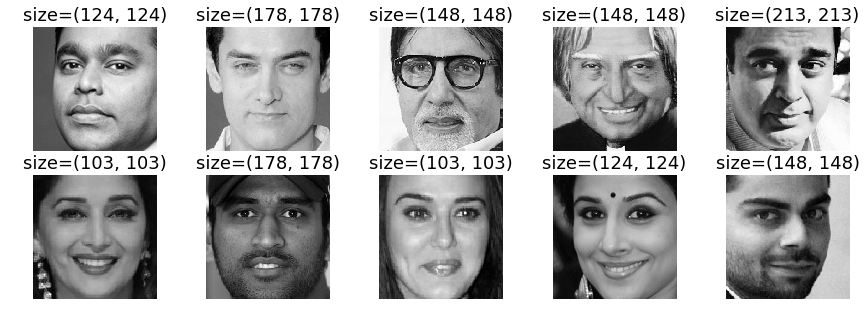

In [29]:
# Plot one image of each class

# Number of images ot be plotted
N = 10

plt.figure(figsize=(15, 5))

# For each class
for i, indian in enumerate(indians):
    
    # Make subplot
    # Syntax - plt.subplot(number_of_rows, number_of_columns, current_image_number)
    # The 'current_image_number' starts from 1
    plt.subplot(2, 5, i+1)
    
    # Plot the 0th image
    example_face_image = images[i][0]
    plt.imshow(example_face_image, cmap="gray")
    
    # Turn off axis lines
    plt.axis("off")
    
    # (Optional) Write the size of the image as its title
    plt.title("size="+str(example_face_image.shape), size=18)

plt.show()

# 2. Splitting the dataset into "train", "val" and "test"

As mentioned in the lesson, usually datasets are split into 3 parts - **train**, **validation**, and **test**.

Earlier, we used to split datasets into training and testing only - training has ground truth labels but testing does not (in real cases). But it is important to understand how a model will perform on unseen data.

For this purpose, the training data is further split into training and validation data. A model is trained on the training data, and predictions are made on the validation data. Then, since the ground truth of the validation data is available, the model's accuracy on the validation data is calculated. This accuracy gives a good insight into how well the model will perform on unseen data.

## Ensuring class balance

It is important to maintain equal number of images per celebrity in the train, val and test datasets. This ensures that the model and the calculated accuracies are not biased towards any class. We know that we have 20 images per celebrity.

**Exercise 1: Edit 3 lines of code to split the "images", such that 60% is assigned as training data, 20% as validation, and 20% as test.**

In [ ]:
# Number of images in training set per celebrity
number_of_images_per_class_in_train = ?????

# Number of images in validation set per celebrity
number_of_images_per_class_in_val = ?????

# Number of images in test set per celebrity
number_of_images_per_class_in_test = ?????

Using these values, let us make the train, val and test sets:

In [ ]:
# Make the train, val, and test sets
images_train = []
images_val = []
images_test = []

# For each celebrity
for i, indian in enumerate(indians):
    
    # Add a new empty list item
    images_train.append([])
    images_val.append([])
    images_test.append([])
    
    # Add the specified number of images to the train set
    for train_iter in range(0, int(number_of_images_per_class_in_train)):
        images_train[-1].append(images[i][train_iter])
    
    # Add the specified number of images to the val set
    for val_iter in range(int(number_of_images_per_class_in_train),
                          int(number_of_images_per_class_in_train + number_of_images_per_class_in_val)):
        images_val[-1].append(images[i][val_iter])
    
    # Add the specified number of images to the test set
    for test_iter in range(int(number_of_images_per_class_in_train + number_of_images_per_class_in_val),
                           int(number_of_images_per_class_in_train + number_of_images_per_class_in_val + number_of_images_per_class_in_test)):
        images_test[-1].append(images[i][test_iter])
    

# IMAGE MANIPULATIONS

In order to train a model, the images have to be manipulated so as to have similar properties. We shall see these manipulation tasks below.

We shall be manipulating on the images of the training data first, step-by-step. Then, we shall make a function of all the manipulation tasks, and apply them on validation and testing images as well.

## 1. Image Resizing

As can be seen, the images are of different sizes. The A.R.Rahman image is of size (164, 165), i.e. 164 rows and 165 columns, while the Amitabh Bachchan image is of size (206, 206).

We need to resize all the images to a constant size.

**Exercise 2: Write 1 line to the code below to resize the images to (224, 224)**

In [ ]:
# Resize images
resized_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, 12 images per celebrity in "train", each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        image = images_train[i][j]
        
        # Code to resize image
        # (Hint: look for "python3 cv2 resize")
        resized_image = ????????????????
        
        resized_images_train[i][j] = resized_image

Plot one **resized_image** of each class to check if resizing worked (using the same code as above)

In [ ]:
# Number of images to be plotted
N = 10

# Plot one image of each class
plt.figure(figsize=(15, 5))

# For each class
for i, indian in enumerate(indians):
    
    # Make a subplot
    # Syntax - plt.subplot(number_of_rows, number_of_columns, current_image_number)
    # The 'current_image_number' starts from 1
    plt.subplot(N//5, 5, i+1)
    
    # Plot the image
    example_face_image = resized_images_train[i][0]  # Changed "images_train" to "resized_images_train"
    plt.imshow(example_face_image, cmap="gray")
    
    # Turn off axis lines
    plt.axis("off")
    
    # (Optional) Write the size of the image as a title
    plt.title("size="+str(example_face_image.shape), size=18)

plt.show()

We can (hopefully) see that all the images are now $224\times224$, so resizing worked!

---- **(If this is not the case, please recheck your code)**

## 2. Image Normalization

As an example, let us see the pixel values of the 4th image of Madhuri Dixit. We know that image pixel values range between 0 and 255.

In [ ]:
madhuri_dixit_index = 5
example_image = resized_images_train[madhuri_dixit_index][4]
# When displaying image using plt.imshow, we specify that the
# minimum and maximum possible values of the image are 0 and 255
# in the arguments vmin and vmax
plt.imshow(example_image, cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

Let us check the minimum and maximum values of this image:

In [ ]:
# Printing the minimum and maximum values of the image
print(resized_images_train[madhuri_dixit_index][4].min(), resized_images_train[madhuri_dixit_index][4].max())

As we can see, the maximum pixel value in this image is 171, while we know that the maximum possible pixel value of an image is 255. No wonder this image appears dark.

Let us scale the pixels values in each image in the dataset such that the minimum pixel value within the image becomes 0, and the maximum becomes 255. This way, we are ensuring that the full range of values available (0-255) are being covered in the image. This should result in the above image becoming _brighter_.

From the previous lessons, we know that this is called **Min-Max Scaling**.

**Exercise 3: Write 1 line of code below to normalize the images using Min-Max Scaling, such that the minimum and maximum pixel values in each image are 0 and 255**

In [ ]:
# MinMax Scaling of images
minmax_scaled_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        resized_image = resized_images_train[i][j]
        
        # Code to normalize image using minmax scaling
        # (Hint: Look in numpy's documentation for minimum and maximum)
        minmax_scaled_image = ????????????????
        
        minmax_scaled_images_train[i][j] = minmax_scaled_image

Let us check the 4th Madhuri Dixit image before and after min-max scaling to see if it worked.

In [ ]:
# Printing the minimum and maximum values of the image
print(minmax_scaled_images_train[madhuri_dixit_index][4].min(), minmax_scaled_images_train[madhuri_dixit_index][4].max())

In [ ]:
# Showing image before and after min-max scaling
madhuri_dixit_index = 5
plt.subplot(121)
plt.imshow(resized_images_train[madhuri_dixit_index][4], cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.subplot(122)
plt.imshow(minmax_scaled_images_train[madhuri_dixit_index][4], cmap='gray', vmin=0, vmax=255)
plt.axis("off")
plt.show()

We can (hopefully) see that the image does become brighter, and its minimum and maximum values are 0 and 255. Min-max scaling worked!

---- **(If this not the case, please recheck your code.)**

## 3. Combining 1st and 2nd dimensions

Till now, we maintained the 1st dimension as iterating through celebrities, and the 2nd dimension as iterating throught the images of each celebrity. This was done only for illustrative purposes. $minmax\_scaled\_images\_train$ is of shape $10\times num\_of\_images\_per_\_class\_in\_train\times224\times224$.

But, usually datasets have the first dimension as iterating through all the samples, without further division. So let us combine the first and second dimensions to make the new shape $(10 * num\_of\_images\_per\_class\_in\_train)\times224\times224$

In [ ]:
# Combining 1st and 2nd dimensions
collated_images = np.reshape(minmax_scaled_images_train, (10*int(number_of_images_per_class_in_train), 224, 224))

## 4. Reshaping to $n\times K^2$

If $n$ is the number of samples in a set of images, and $K$ is the number or rows (or columns) in an image, we would like our dataset to be in $n\times K^2$ shape, so samples are the first dimension, and features (all the pixel values) are the second dimension.

**Exercise 4: Write 1 line of code to _reshape_ the data into an $n\times K^2$ shape**

In [ ]:
# Reshaping into n x K^2
reshaped_images = ???????

## 4. Subtracting $mean\_image$

Since we are interested in the difference between the faces, let’s subtract the characteristics which are common between them. The common characteristic of each pixel value is its mean among all the training images. Thus, let us find the $mean\_image$, and subtract it from all the images.

**Exercise 5: Write 1 line of code to find the mean image of the training images, using numpy**. Hint: Check for the "axis" argument.

In [ ]:
# Calculating mean image
mean_image = ???????

Check that your mean image is of the correct shape:

In [ ]:
print(mean_image.shape)

---- **If the image shape is not (50176,), i.e. 224^2, please recheck your code.**

Let us now subtract the $mean\_image$ from all the images:

In [ ]:
# Subtracting mean image from the training images
final_images_train = reshaped_images - mean_image

### Visualizing mean image

For curiosity's sake, let us see how the mean image looks:

In [ ]:
plt.imshow(np.reshape(mean_image, (224, 224)), cmap='gray')
plt.axis("off")
plt.show()

As can be seen, the mean image consists of a pair of eyes, a nose, a mouth, etc., at the right places. This is possible since all the face images in the dataset were oriented and aligned to each other.

Had the images not been aligned, the mean image would have looked like this:

<img src="../Datasets/vgg_face_indian_dataset/hazy_mean_image.png">

# VALIDATION AND TEST DATA

## - Image manipulations for validation and test data

The same image manipulations must be carried out on the validation and test images. Below is a function that performs all the operations step-by-step. Note that the mean image is calculated only on the training set.

**Please copy-paste the solutions to the relevant exercises (2, 3, and 4) at the respective places**:

In [ ]:
def manipulate_images(images, number_of_images_per_class, mean_image):
    
    # Manipulated images
    manipulated_images = np.zeros((10, int(number_of_images_per_class), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
    
    for i in range(len(indians)):
        for j in range(int(number_of_images_per_class)):
            image = images[i][j]

            # Code to resize image
            # (Hint: look for "python3 cv2 resize")
            resized_image = ????????????????
            
            # Code to normalize image using minmax scaling
            # (Hint: Look in numpy's documentation for minimum and maximum)
            minmax_scaled_image = ????????????????
            
            manipulated_images[i][j] = minmax_scaled_image
            
    # Combining 1st and 2nd dimensions
    collated_images = np.reshape(manipulated_images, (10*int(number_of_images_per_class), 224, 224))
    
    # Reshaping into n x K^2
    reshaped_images = ???????
    
    # Subtracting mean image from the training images
    final_images = reshaped_images - mean_image
    
    return final_images

Now use this function to find the final images of val and test data:

In [ ]:
# Finding final images for val and test
final_images_val = manipulate_images(images_val, number_of_images_per_class_in_val, mean_image)
final_images_test = manipulate_images(images_test, number_of_images_per_class_in_test, mean_image)

# LABELS

Let us make the labels for train, val and test. Each of the 10 celebrities shall be associated with a number among {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}: 

In [ ]:
labels_train = np.array([[i]*number_of_images_per_class_in_train for i in range(10)]).flatten()
labels_val = np.array([[i]*number_of_images_per_class_in_val for i in range(10)]).flatten()
labels_test = np.array([[i]*number_of_images_per_class_in_test for i in range(10)]).flatten()

For example, we know that there are 4 images per celebrity in the validation set of 40 images. Their labels now are:

In [ ]:
print(labels_val)

# SAVE DATA

Let us save the data as "data.npz" format, so that we can load it in the next notebook.

In [ ]:
# Save the train, val, and test data and labels, and the mean image
np.savez("data",
         data_train=final_images_train, labels_train=labels_train,
         data_val=final_images_val, labels_val=labels_val,
         data_test=final_images_test, labels_test=labels_test,
         mean_image=mean_image)

# Proceed to Part 2 ...

# SOLUTIONS

## Exercise 1

In [ ]:
# Number of images in training set per celebrity
number_of_images_per_class_in_train = 12

# Number of images in validation set per celebrity
number_of_images_per_class_in_val = 4

# Number of images in test set per celebrity
number_of_images_per_class_in_test = 4

## Exercise 2

In [ ]:
# Resize images
resized_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, 12 images per celebrity in "train", each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        image = images_train[i][j]
        
        # Code to resize image
        # (Hint: look for "python3 cv2 resize")
        resized_image = cv2.resize(image, (224, 224))
        
        resized_images_train[i][j] = resized_image

## Exercise 3

In [ ]:
# MinMax Scaling of images
minmax_scaled_images_train = np.zeros((10, int(number_of_images_per_class_in_train), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
for i in range(len(indians)):
    for j in range(int(number_of_images_per_class_in_train)):
        resized_image = resized_images_train[i][j]
        
        # Code to normalize image using minmax scaling
        # (Hint: Look in numpy's documentation for minimum and maximum)
        minmax_scaled_image = (resized_image - np.min(resized_image))/(np.max(resized_image) - np.min(resized_image))*255
        
        minmax_scaled_images_train[i][j] = minmax_scaled_image

## Exercise 4

In [ ]:
# Reshaping into n x K^2
reshaped_images = np.reshape(collated_images, (collated_images.shape[0], 224*224))

## Exercise 5

In [ ]:
# Calculating mean image
mean_image = np.mean(reshaped_images, axis=0)

## Function to manipulate images

In [ ]:
def manipulate_images(images, number_of_images_per_class, mean_image):
    
    # Manipulated images
    manipulated_images = np.zeros((10, int(number_of_images_per_class), 224, 224)) # 10 celebrities, some images per celebrity, each image of size (224, 224)
    
    for i in range(len(indians)):
        for j in range(int(number_of_images_per_class)):
            image = images[i][j]

            # Code to resize image
            # (Hint: look for "python3 cv2 resize")
            resized_image = cv2.resize(image, (224, 224))
            
            # Code to normalize image using minmax scaling
            # (Hint: Look in numpy's documentation for minimum and maximum)
            minmax_scaled_image = (resized_image - np.min(resized_image))/(np.max(resized_image) - np.min(resized_image))*255
            
            manipulated_images[i][j] = minmax_scaled_image
            
    # Combining 1st and 2nd dimensions
    collated_images = np.reshape(manipulated_images, (10*number_of_images_per_class, 224, 224))
    
    # Reshaping into n x K^2
    reshaped_images = np.reshape(collated_images, (collated_images.shape[0], 224*224))
    
    # Subtracting mean image from the training images
    final_images = reshaped_images - mean_image
    
    return final_images